Build a simple linear regression model using AdaGrad + SGD optimizer to help 33/11KV substation electric utility to trade power effectively in an day ahead energy market by estimating load at a particular hour based on the load at the same day and hour but in previous week. Dataset : Active power load dataset.

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_excel("/Load_Data_in_kW.xlsx",header=None)
data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


**Outliers:**

In [4]:
z=np.abs(stats.zscore(data))
print(z)

[[0.04910416]
 [0.08229029]
 [0.08782131]
 ...
 [0.09743692]
 [0.07253822]
 [0.03181432]]


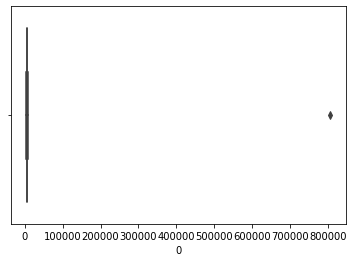

In [5]:
sns.boxplot(x=data[0])

In [6]:
df=data
q=df[0].quantile(0.99)
df[df[0]<q]
q_low=df[0].quantile(0.01)
q_hi=df[0].quantile(0.99)
df_filtered=df[(df[0]<q_hi)&(df[0]>q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [7]:
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
    print('No outliers')

2184
2140


**Normalisation:**

In [8]:
data=df_filtered
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


**Split data**

In [9]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [10]:
print(len(train_data))
train_data.head()

1926


,0
1013,0.548087
1581,0.351891
812,0.441788
632,0.335037
638,0.835733


In [11]:
x=[]
y=[]
for i in range(len(train_data.iloc[:,0])-24):
    x.append(train_data.iloc[i,0])
    y.append(train_data.iloc[i+24,0])

m=1
c=-1
epochs=100 #epochs
Gm=0
Gc=0
l=0.1   #learning rate
e=10**(-8)
err=[]
for i in range(epochs):
  er=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    gm=-(y[j]-m*x[j]-c)*(x[j])
    gc=-(y[j]-m*x[j]-c)
    Gm=Gm+(gm**2)
    Gc=Gc+(gc**2)
    d_m=-((l)/(Gm+e)**(0.5))*(gm)
    d_c=-((l)/(Gc+e)**(0.5))*(gc)
    m=m+d_m
    c=c+d_c
    er=(1/(2*len(x)))*(er)
    err.append(er)
print("The minimum value obtained at m=%.2f"%(m),", c=%.2f"%(c))  #print values m and c

The minimum value obtained at m=-0.02 , c=0.48


**MSE,RMSE for Training data :**

In [12]:
train_data_pred = [i for i in x]
for k in range(len(x)):
    train_data_pred[k]=(m*x[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,train_data_pred)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root mean square error for training data (RMSE) : ",mse**0.5)

Mean Square Error for training data (MSE) :  0.04420921236512867
Root mean square error for training data (RMSE) :  0.21025986865098312


Text(0.5, 1.0, 'Predicted data vs Actual data')

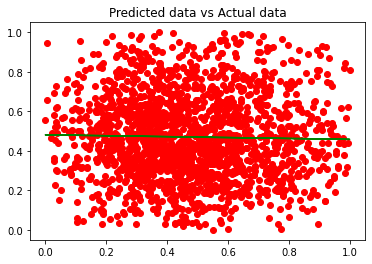

In [13]:
plt.plot(np.array(x),np.array(train_data_pred),'green')
plt.scatter(np.array(x),np.array(y),color='red')
plt.title('Predicted data vs Actual data')

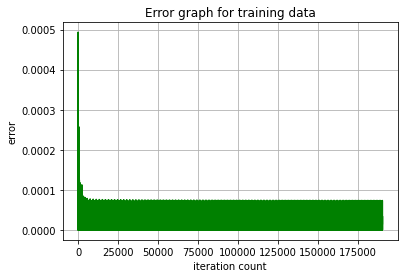

In [14]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Test Data:**

In [15]:
xx = []
yy = []
for i in range(len(test_data.iloc[:,0])-24):
    xx.append(test_data.iloc[i,0])
    yy.append(test_data.iloc[i+24,0])
test_data_pred = [i for i in xx]
for k in range(len(xx)):
    test_data_pred[k]=(m*xx[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yy,test_data_pred)
print("Mean Square Error for testing data (MSE) : ",mse)
print("Root Mean Square Error for testing data (RMSE) : ",mse**0.5)

Mean Square Error for testing data (MSE) :  0.045773411519466255
Root Mean Square Error for testing data (RMSE) :  0.2139472166667897


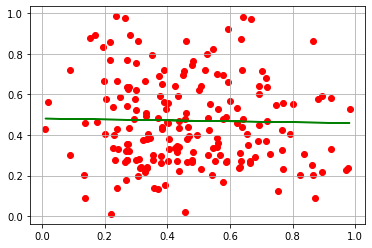

In [16]:
plt.scatter(xx,yy,color='red')
plt.plot(xx,test_data_pred,'green')
plt.grid()

**Predict the Output:**

In [18]:
x_max=y_max= 8841.669480
x_min=y_min= 3377.919600
x2= float(input("Enter load of previous hour : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Load at hour based on its previous hour {} is : {}".format(x2,yi))

Enter load of previous hour : 5072.95872
Load at hour based on its previous hour 5072.95872 is : 5967.661456654931
